In [1]:
from torchvision.datasets import MovingMNIST

In [2]:
split_ratio=19

In [3]:
dataset = MovingMNIST(root='../data', split="train", download=True, split_ratio=split_ratio)

In [29]:
dataset = MovingMNIST(root='../datasets', split=None, download=True)
val_percentage = 0.05


In [30]:
import torch

# Split the dataset into training and validation
n_samples = len(dataset)
n_val = int(val_percentage * n_samples)

val_dataset, train_dataset = torch.utils.data.random_split(dataset, [n_val, n_samples - n_val])

In [36]:
import numpy as np

In [38]:
np.array(val_dataset).shape

(500, 20, 1, 64, 64)

In [4]:
# data is of shape Video frames (torch Tensor[T, C, H, W]). The T is the number of frames.

In [34]:
len(train_dataset), dataset[0].shape

(9500, torch.Size([20, 1, 64, 64]))

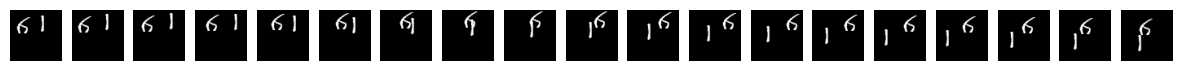

In [33]:
# Plot some examples from the dataset

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, split_ratio, figsize=(15, 3))
for i in range(split_ratio):
    axes[i].imshow(train_dataset[0][i][0], cmap='gray')
    axes[i].axis('off')

In [6]:
import h5py

# Write the Moving MNIST dataset to a HDF5 file with the following format, without using .cumulative_sizes
#     {
#         'train_data': [B, H, W, 3] np.uint8,
#         'train_idx': [B], np.int64 (start indexes for each video)
#         'test_data': [B', H, W, 3] np.uint8,
#         'test_idx': [B'], np.int64
#     }
#     where B is the number of training videos, H and W are the height and width of the video frames, and 3 is the number of channels (RGB).
with h5py.File('moving_mnist.h5', 'w') as f:
    # Flatten along index and time dimensions for train_data
    train_data = dataset.data.view(-1, 64, 64, 1).numpy()
    # Duplicate single gray value axis to 3 channels
    import numpy as np
    train_data = np.repeat(train_data, 3, axis=-1)
    train_idx = np.arange(0, len(dataset) * split_ratio, split_ratio)
    f.create_dataset('train_data', data=train_data)
    f.create_dataset('train_idx', data=train_idx)
    # Flatten along index and time dimensions for test_data
    test_data = dataset.data.view(-1, 64, 64, 1).numpy()
    # Duplicate single gray value axis to 3 channels
    test_data = np.repeat(test_data, 3, axis=-1)
    test_idx = np.arange(0, len(dataset) * split_ratio, split_ratio)
    f.create_dataset('test_data', data=test_data)
    f.create_dataset('test_idx', data=test_idx)

In [10]:
xyz.shape

(19, 64, 64, 3)

In [7]:
xyz = train_data[:19]

In [14]:
from videogpt import VQVAE, VideoData

In [43]:
model = VQVAE.load_from_checkpoint("/space/ddenblanken/Projects/VideoGPT/moving_mnist_vqvae/gp6vdxl9/checkpoints/epoch=82-step=25979.ckpt")

# disable randomness, dropout, etc...
model.eval()

VQVAE(
  (encoder): Encoder(
    (convs): ModuleList(
      (0): SamePadConv3d(
        (conv): Conv3d(3, 240, kernel_size=(4, 4, 4), stride=(2, 2, 2))
      )
      (1): SamePadConv3d(
        (conv): Conv3d(240, 240, kernel_size=(4, 4, 4), stride=(2, 2, 2))
      )
    )
    (conv_last): SamePadConv3d(
      (conv): Conv3d(240, 240, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    )
    (res_stack): Sequential(
      (0): AttentionResidualBlock(
        (block): Sequential(
          (0): BatchNorm3d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
          (2): SamePadConv3d(
            (conv): Conv3d(240, 120, kernel_size=(3, 3, 3), stride=(1, 1, 1), bias=False)
          )
          (3): BatchNorm3d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU()
          (5): SamePadConv3d(
            (conv): Conv3d(120, 240, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
          )
          (6): BatchNor

In [44]:
data = VideoData(model.args)

val_dataset = data._dataset(True)

train_datalaoder = data.train_dataloader()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './moving_mnist.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [17]:
# Get one batch of data
for batch in train_datalaoder:
    break

In [18]:


video = batch['video'][0].permute(1, 2, 3, 0).numpy()

In [26]:
video = batch['video'][0].permute(1, 2, 3, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

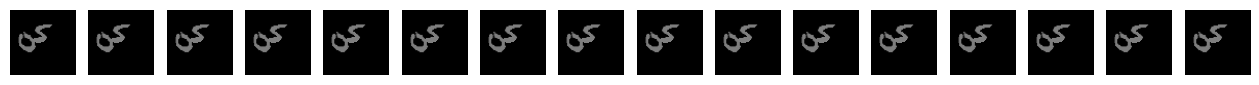

In [25]:
import numpy as np
import matplotlib.pyplot as plt

index = 8

fig, ax = plt.subplots(1, 16, figsize=(16, 1))

for i in range(16):
    ax[i].imshow(video[0])
    ax[i].axis("off")

KeyboardInterrupt: 

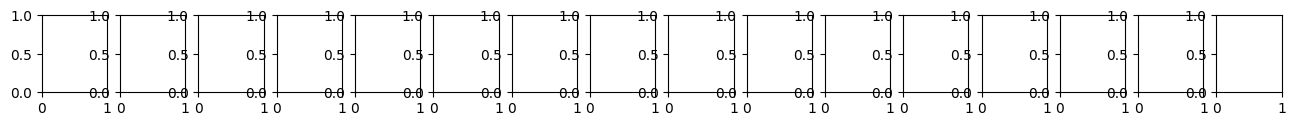

In [25]:
import numpy as np
import matplotlib.pyplot as plt

index = 0

fig, ax = plt.subplots(1, 16, figsize=(16, 1))
video = val_dataset[index]['video'].permute(1, 2, 3, 0).numpy()

for i in range(16):
    ax[i].imshow(video[0])
    ax[i].axis("off")